<h1>Практична робота №8<h1>
<h2>Пруніч Сергій МІТ-31<h2>

In [3]:
import zipfile
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense
import pandas as pd

In [10]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()
main_dir="10_food_classes_all_data"

In [5]:
food_list = os.listdir("10_food_classes_all_data/train")
food_list.sort()
print(food_list)

['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


In [6]:
img_dir_1 = pathlib.Path('10_food_classes_all_data/train/ice_cream')
img_dir_2 = pathlib.Path('10_food_classes_all_data/train/pizza')
filepaths_1 = list(img_dir_1.glob(r'*.jpg'))
filepaths_2 = list(img_dir_2.glob(r'*.jpg'))

(512, 512, 3)


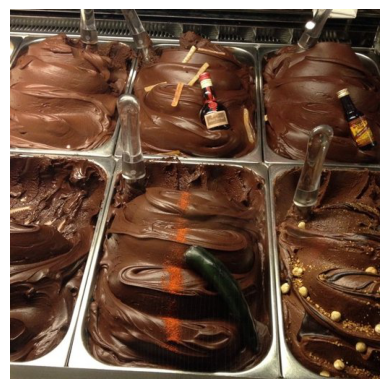

In [7]:
img = mpimg.imread(filepaths_1[0])
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [11]:
tf.random.set_seed(42)
# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = main_dir+"/train/"
test_dir = main_dir+"/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=30,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=3,
                            restore_best_weights=True
                        )
                    ])


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/30


47/47 [==============================] - 17s 328ms/step - loss: 0.5875 - accuracy: 0.6353 - val_loss: 0.5352 - val_accuracy: 0.7200
Epoch 2/30
47/47 [==============================] - 14s 294ms/step - loss: 0.4912 - accuracy: 0.7693 - val_loss: 0.4546 - val_accuracy: 0.7940
Epoch 3/30
47/47 [==============================] - 14s 295ms/step - loss: 0.4540 - accuracy: 0.7913 - val_loss: 0.4046 - val_accuracy: 0.8200
Epoch 4/30
47/47 [==============================] - 14s 299ms/step - loss: 0.4029 - accuracy: 0.8313 - val_loss: 0.3878 - val_accuracy: 0.8200
Epoch 5/30
47/47 [==============================] - 14s 307ms/step - loss: 0.3733 - accuracy: 0.8427 - val_loss: 0.4148 - val_accuracy: 0.7960
Epoch 6/30
47/47 [==============================] - 15s 327ms/step - loss: 0.3097 - accuracy: 0.8740 - val_loss: 0.3999 - val_accuracy: 0.8240
Epoch 7/30
47/47 [==============================] - 14s 3

<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

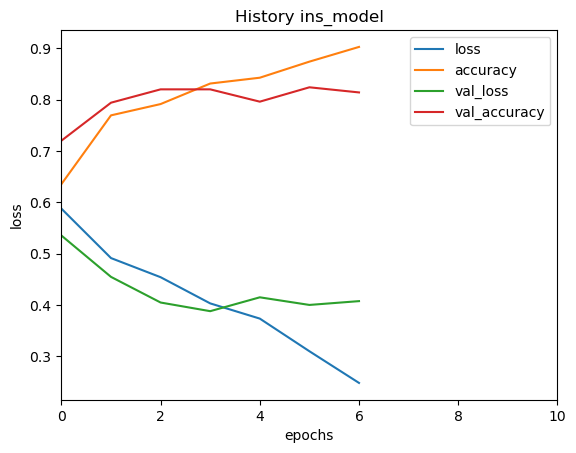

In [12]:
pd.DataFrame(history_1.history).plot(xlabel="epochs",
ylabel="loss",title="History ins_model", xlim=(0,10))

In [13]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=3,
                            restore_best_weights=True
                        )
                    ])

Epoch 1/50
47/47 [==============================] - 16s 329ms/step - loss: 0.6876 - accuracy: 0.5373 - val_loss: 0.6780 - val_accuracy: 0.5340
Epoch 2/50
47/47 [==============================] - 14s 299ms/step - loss: 0.6531 - accuracy: 0.6333 - val_loss: 0.6349 - val_accuracy: 0.6360
Epoch 3/50
47/47 [==============================] - 14s 299ms/step - loss: 0.6132 - accuracy: 0.6873 - val_loss: 0.5726 - val_accuracy: 0.7060
Epoch 4/50
47/47 [==============================] - 14s 299ms/step - loss: 0.5628 - accuracy: 0.7180 - val_loss: 0.6184 - val_accuracy: 0.6740
Epoch 5/50
47/47 [==============================] - 14s 304ms/step - loss: 0.5555 - accuracy: 0.7267 - val_loss: 0.5822 - val_accuracy: 0.7020
Epoch 6/50
47/47 [==============================] - 14s 301ms/step - loss: 0.5532 - accuracy: 0.7353 - val_loss: 0.5454 - val_accuracy: 0.7120
Epoch 7/50
47/47 [==============================] - 14s 302ms/step - loss: 0.5272 - accuracy: 0.7473 - val_loss: 0.5292 - val_accuracy: 0.7280

<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

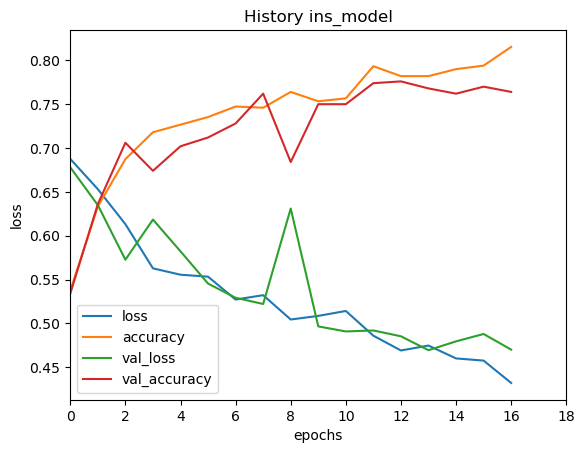

In [14]:
pd.DataFrame(history_2.history).plot(xlabel="epochs",
ylabel="loss",title="History ins_model", xlim=(0,18))

In [15]:
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=30,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=3,
                            restore_best_weights=True
                        )
                    ])



Epoch 1/30
47/47 [==============================] - 14s 294ms/step - loss: 0.6704 - accuracy: 0.5887 - val_loss: 0.6046 - val_accuracy: 0.7520
Epoch 2/30
47/47 [==============================] - 13s 285ms/step - loss: 0.5937 - accuracy: 0.6853 - val_loss: 0.5533 - val_accuracy: 0.7440
Epoch 3/30
47/47 [==============================] - 14s 289ms/step - loss: 0.5538 - accuracy: 0.7273 - val_loss: 0.5743 - val_accuracy: 0.7060
Epoch 4/30
47/47 [==============================] - 15s 310ms/step - loss: 0.5343 - accuracy: 0.7333 - val_loss: 0.5191 - val_accuracy: 0.7560
Epoch 5/30
47/47 [==============================] - 14s 290ms/step - loss: 0.5243 - accuracy: 0.7547 - val_loss: 0.5085 - val_accuracy: 0.7680
Epoch 6/30
47/47 [==============================] - 13s 285ms/step - loss: 0.5087 - accuracy: 0.7420 - val_loss: 0.5013 - val_accuracy: 0.7580
Epoch 7/30
47/47 [==============================] - 13s 285ms/step - loss: 0.5061 - accuracy: 0.7600 - val_loss: 0.4850 - val_accuracy: 0.7800

<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

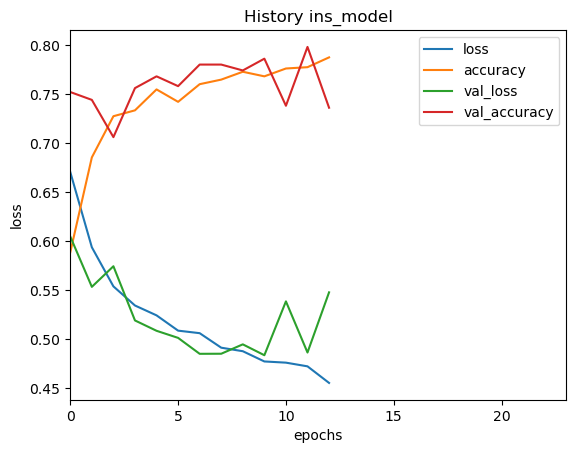

In [17]:
pd.DataFrame(history_3.history).plot(xlabel="epochs",
ylabel="loss",title="History ins_model", xlim=(0,23))

In [18]:
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=2,
                            restore_best_weights=True
                        )
                    ])

Epoch 1/50
47/47 [==============================] - 15s 314ms/step - loss: 0.6952 - accuracy: 0.4907 - val_loss: 0.6856 - val_accuracy: 0.5980
Epoch 2/50
47/47 [==============================] - 15s 314ms/step - loss: 0.6770 - accuracy: 0.6267 - val_loss: 0.6879 - val_accuracy: 0.5120
Epoch 3/50
47/47 [==============================] - 14s 298ms/step - loss: 0.6338 - accuracy: 0.6573 - val_loss: 0.5929 - val_accuracy: 0.7140
Epoch 4/50
47/47 [==============================] - 14s 301ms/step - loss: 0.5851 - accuracy: 0.6940 - val_loss: 0.6443 - val_accuracy: 0.5240
Epoch 5/50
47/47 [==============================] - 14s 302ms/step - loss: 0.5608 - accuracy: 0.7240 - val_loss: 0.5467 - val_accuracy: 0.7360
Epoch 6/50
47/47 [==============================] - 14s 300ms/step - loss: 0.5353 - accuracy: 0.7413 - val_loss: 0.5218 - val_accuracy: 0.7400
Epoch 7/50
47/47 [==============================] - 14s 301ms/step - loss: 0.5464 - accuracy: 0.7327 - val_loss: 0.5240 - val_accuracy: 0.7400

<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

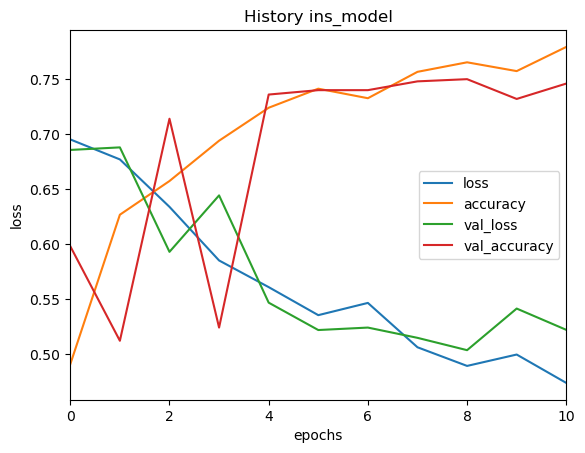

In [19]:
pd.DataFrame(history_4.history).plot(xlabel="epochs",
ylabel="loss",title="History ins_model", xlim=(0,10))

Epoch 1/10
47/47 [==============================] - 11s 227ms/step - loss: 0.5913 - accuracy: 0.6780 - val_loss: 0.5276 - val_accuracy: 0.7360
Epoch 2/10
47/47 [==============================] - 10s 211ms/step - loss: 0.5142 - accuracy: 0.7647 - val_loss: 0.4843 - val_accuracy: 0.7620
Epoch 3/10
47/47 [==============================] - 10s 210ms/step - loss: 0.4972 - accuracy: 0.7740 - val_loss: 0.4487 - val_accuracy: 0.7940
Epoch 4/10
47/47 [==============================] - 10s 212ms/step - loss: 0.4742 - accuracy: 0.7840 - val_loss: 0.4194 - val_accuracy: 0.8300
Epoch 5/10
47/47 [==============================] - 10s 212ms/step - loss: 0.4383 - accuracy: 0.8027 - val_loss: 0.4070 - val_accuracy: 0.8280
Epoch 6/10
47/47 [==============================] - 10s 213ms/step - loss: 0.4264 - accuracy: 0.8113 - val_loss: 0.4423 - val_accuracy: 0.7900
Epoch 7/10
47/47 [==============================] - 10s 212ms/step - loss: 0.4078 - accuracy: 0.8167 - val_loss: 0.3661 - val_accuracy: 0.8540

<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

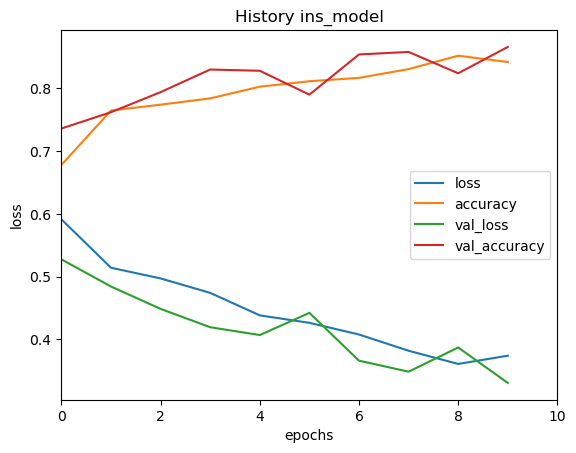

In [20]:
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=2,
                            restore_best_weights=True
                        )
                    ])

pd.DataFrame(history_5.history).plot(xlabel="epochs",
ylabel="loss",title="History ins_model", xlim=(0,10))